In [1]:
from skimage.io import imread_collection

leshimania = imread_collection('../../../dataset/Dataset_geral/Dataset_geral/*/*')



In [2]:
from skimage.filters import threshold_otsu, threshold_niblack
from sklearn.cluster import KMeans
import numpy as np
from skimage.color import rgb2gray

import cv2
from skimage.filters import threshold_niblack
from sklearn.cluster import KMeans, DBSCAN, estimate_bandwidth, MeanShift


def limiar_otsu(list_img):
    images = list_img
    list_img_bin = []
    for img in images:
        list_img_bin.append(aplicaOtsu(img))
    return list_img_bin


def aplicaKmeans(img):
    img =rgb2gray(img)
    model = KMeans(n_clusters=2, random_state=0).fit(np.reshape(img,(-1, 1)))
    segmented = model.predict(np.reshape(img,(-1, 1)))
    segmented = np.reshape(segmented,(img.shape[0],img.shape[1]))
    return segmented

def aplicaOtsu(img):
    img =rgb2gray(img)

    thresh = threshold_otsu(img)
    binary = img > thresh
    return binary

def aplicaNiblack(img):
    img =rgb2gray(img)

    thresh = threshold_niblack(img, window_size=69, k=0.5)
    binary = img > thresh
    return binary

def aplicaMeanShift(img):
    img =rgb2gray(img)

    flat_img = img.reshape((-1, 1))

    bandwidth = estimate_bandwidth(flat_img, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(flat_img)

    labels = ms.labels_
    segmented = np.reshape(labels, img.shape)

    return segmented
    

In [ ]:

from skimage.transform import resize
imagens_original = [np.array(resize((img),(512,512))) for img in leshimania]
# mascaras_medico = [np.array(resize(img,(512,512))) for img in mascaras_medico]
imagens_gray = [rgb2gray(img) for img in imagens_original]

In [3]:
img = aplicaKmeans(leshimania[0])

/home/lucas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/lucas/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


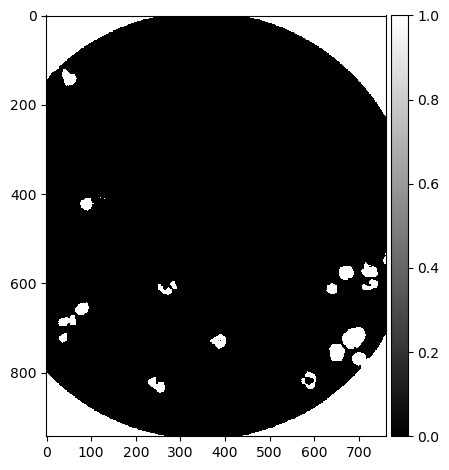

In [4]:
from skimage.io import imshow

imshow(img.copy(), cmap='gray')

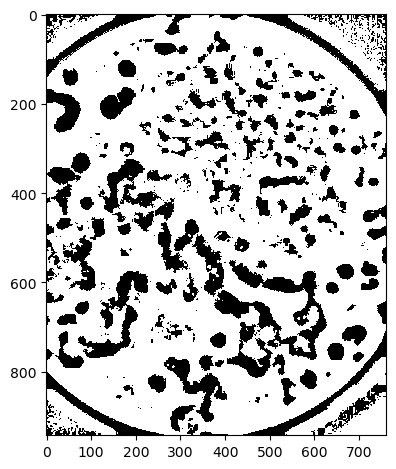

In [5]:
img_niblack = aplicaNiblack(leshimania[0].copy())
imshow(img_niblack, cmap='gray')

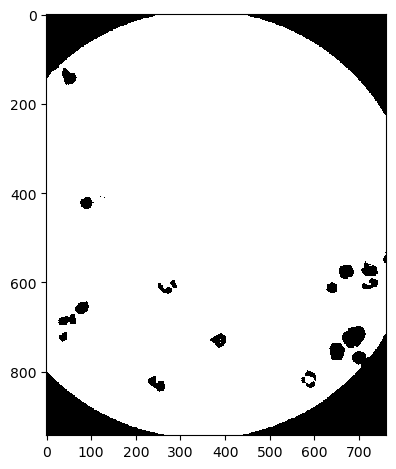

In [6]:
img_otsu = aplicaOtsu(leshimania[0].copy())
imshow(img_otsu, cmap='gray')